In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [3]:
carprice = pd.read_excel('out.xlsx')

In [4]:
carprice.head()

size    year  month    value   brand  category
0  1499  2023.0    1.0  32377.0  B.M.W.       1.0
1  1499  2023.0    1.0  30886.0  B.M.W.       1.0
2  1499  2023.0    1.0  31877.0  B.M.W.       1.0
3  1499  2023.0    1.0  33705.0  B.M.W.       1.0
4  1998  2023.0    1.0  45497.0  B.M.W.       2.0

In [5]:
carprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72560 entries, 0 to 72559
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   size      72559 non-null  object 
 1   year      72559 non-null  float64
 2   month     72559 non-null  float64
 3   value     72559 non-null  float64
 4   brand     72559 non-null  object 
 5   category  72558 non-null  float64
dtypes: float64(4), object(2)
memory usage: 3.3+ MB


In [6]:
carprice.isnull().sum()

size        1
year        1
month       1
value       1
brand       1
category    2
dtype: int64

In [7]:
carprice['size'].replace('',np.nan,inplace = True)
carprice['year'].replace('',np.nan,inplace = True)
carprice['month'].replace('',np.nan,inplace = True)
carprice['value'].replace('',np.nan,inplace = True)
carprice['brand'].replace('',np.nan,inplace = True)
carprice['category'].replace('',np.nan,inplace = True)
carprice.dropna(subset=['size'], inplace=True)
carprice.dropna(subset=['year'], inplace=True)
carprice.dropna(subset=['month'], inplace=True)
carprice.dropna(subset=['value'], inplace=True)
carprice.dropna(subset=['brand'], inplace=True)
carprice.dropna(subset=['category'], inplace=True)
carprice.isnull().sum()

size        0
year        0
month       0
value       0
brand       0
category    0
dtype: int64

In [8]:
def check_quarter(month, year, min_year):
    if month <= 3:
        return 4*(year - min_year)
    elif month <= 6:
        return 1 + 4*(year - min_year)
    elif month <= 9:
        return 2 + 4*(year - min_year)
    return 3 + 4*(year - min_year)

In [9]:
carprice['quarter'] = carprice.apply(lambda row: check_quarter(row.month, row.year, 2004), axis = 1)

In [10]:
carprice.head()

size    year  month    value   brand  category  quarter
0  1499  2023.0    1.0  32377.0  B.M.W.       1.0     76.0
1  1499  2023.0    1.0  30886.0  B.M.W.       1.0     76.0
2  1499  2023.0    1.0  31877.0  B.M.W.       1.0     76.0
3  1499  2023.0    1.0  33705.0  B.M.W.       1.0     76.0
4  1998  2023.0    1.0  45497.0  B.M.W.       2.0     76.0

In [13]:
carprice.drop(carprice.index[carprice['size'] == 'electric'], inplace=True)

StopIteration: 

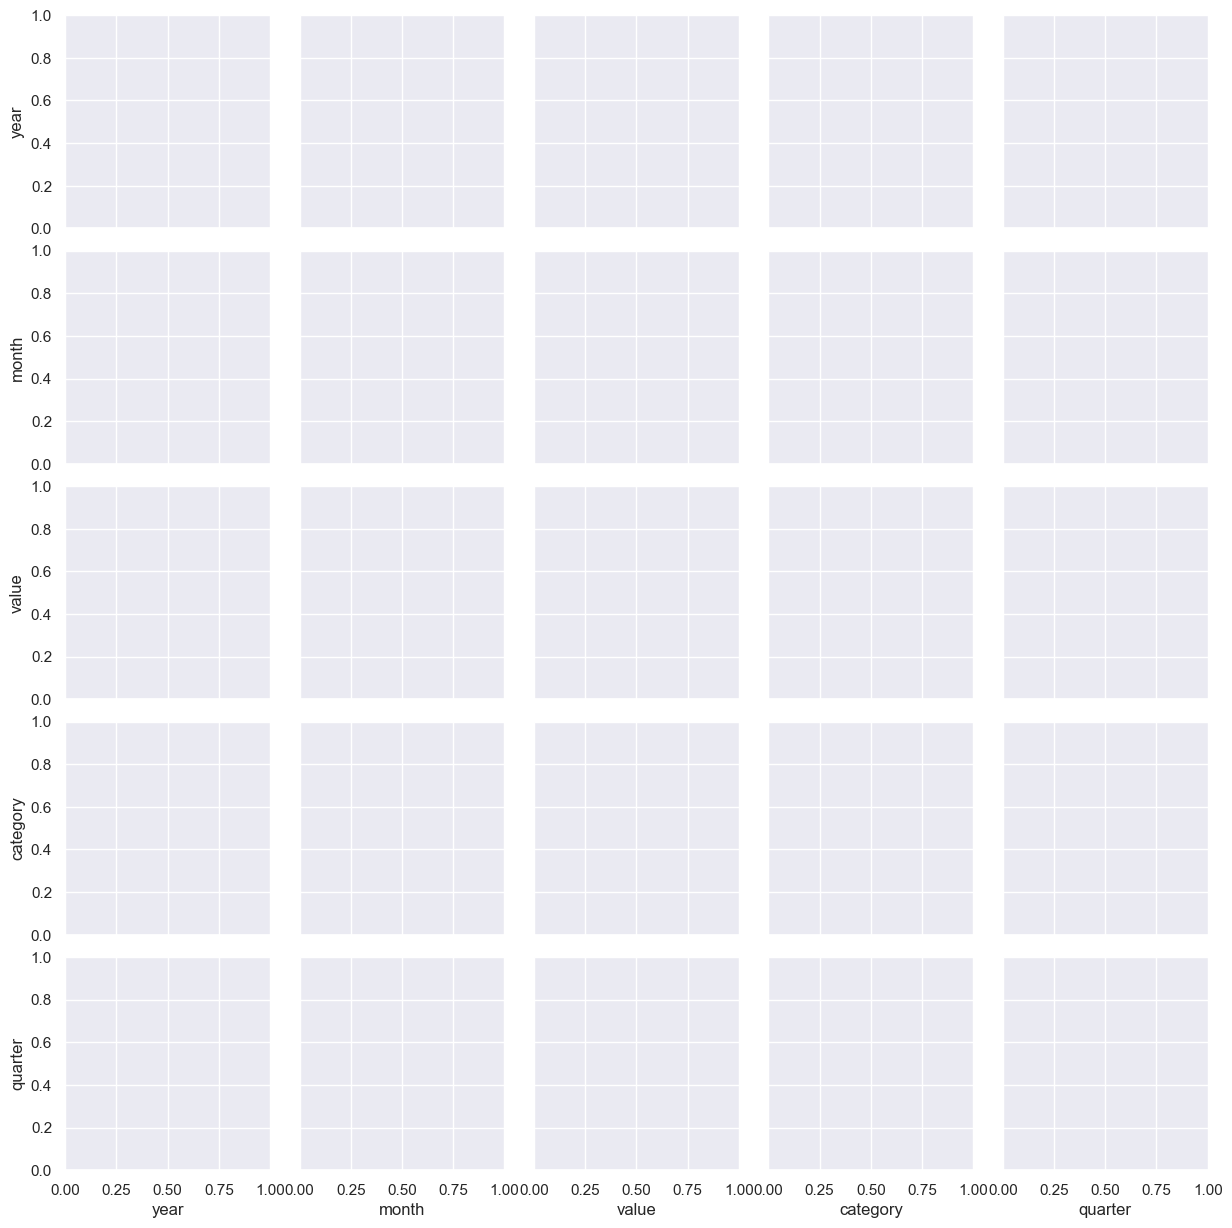

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Let's plot a pair plot of all variables in our dataframe
sns.pairplot(carprice)

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [16]:
brands = list(set(carprice['brand']))

In [17]:
brand_prices = {}

for brand in brands:
    temp = list(carprice[carprice.brand == brand]['value'])
    
    if len(temp) == 0:
        print(brand)
    price = sum(temp) / len(temp)
    brand_prices[brand] = price

In [39]:
ordered_brands = sorted(brand_prices, key=brand_prices.get)


encoder = {}


for x in range(len(ordered_brands)):
    encoder[ordered_brands[x]] = x

In [44]:
with open('ordered car brands.csv', 'a') as f:
    for brand in ordered_brands:
        f.write(brand)
        f.write(',')

In [19]:
carprice['brand_category'] = carprice.apply(lambda row: encoder[row.brand], axis =1)

In [20]:
carprice

size    year  month    value   brand  category  quarter  brand_category
0      1499  2023.0    1.0  32377.0  B.M.W.       1.0     76.0              55
1      1499  2023.0    1.0  30886.0  B.M.W.       1.0     76.0              55
2      1499  2023.0    1.0  31877.0  B.M.W.       1.0     76.0              55
3      1499  2023.0    1.0  33705.0  B.M.W.       1.0     76.0              55
4      1998  2023.0    1.0  45497.0  B.M.W.       2.0     76.0              55
...     ...     ...    ...      ...     ...       ...      ...             ...
72554  1984  2004.0   12.0  38214.0   VOLVO       2.0      3.0              49
72555  2521  2004.0   12.0  43239.0   VOLVO       2.0      3.0              49
72556  2521  2004.0   12.0  50361.0   VOLVO       2.0      3.0              49
72557  2922  2004.0   12.0  53378.0   VOLVO       2.0      3.0              49
72558  2922  2004.0   12.0  59011.0   VOLVO       2.0      3.0              49

[71880 rows x 8 columns]

# Extracting Category A carprice

In [21]:
cat1 = carprice.loc[carprice['category'] == 1]
cat1

size    year  month    value       brand  category  quarter  \
0      1499  2023.0    1.0  32377.0      B.M.W.       1.0     76.0   
1      1499  2023.0    1.0  30886.0      B.M.W.       1.0     76.0   
2      1499  2023.0    1.0  31877.0      B.M.W.       1.0     76.0   
3      1499  2023.0    1.0  33705.0      B.M.W.       1.0     76.0   
21     1499  2023.0    1.0  36186.0      B.M.W.       1.0     76.0   
...     ...     ...    ...      ...         ...       ...      ...   
72535  1497  2004.0   12.0  11781.0      TOYOTA       1.0      3.0   
72536  1497  2004.0   12.0  14090.0      TOYOTA       1.0      3.0   
72539  1595  2004.0   12.0  23150.0  VOLKSWAGEN       1.0      3.0   
72540  1598  2004.0   12.0  25516.0  VOLKSWAGEN       1.0      3.0   
72541  1595  2004.0   12.0  20880.0  VOLKSWAGEN       1.0      3.0   

       brand_category  
0                  55  
1                  55  
2                  55  
3                  55  
21                 55  
...               ...  
72535              44  
72536              44  
72539              38  
72540              38  
72541              38  

[29817 rows x 8 columns]

In [29]:
cat1.to_csv('Car Cat A prices.csv', index = False)

In [22]:
q_low = cat1["value"].quantile(0.01)
q_hi  = cat1["value"].quantile(0.99)

cat1_filtered = cat1[(cat1["value"] < q_hi) & (cat1["value"] > q_low)]

In [23]:
# Extract Response and Predictors
y = pd.DataFrame(cat1_filtered["value"])
X = pd.DataFrame(cat1_filtered[["brand_category", "quarter"]])

In [24]:
# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 100, test_size = 0.20)



Intercept of Regression 	: b =  [5695.71933636]
Coefficients of Regression 	: a =  [[343.59998724  97.88280136]]

       Predictors  Coefficients
0  brand_category    343.599987
1         quarter     97.882801



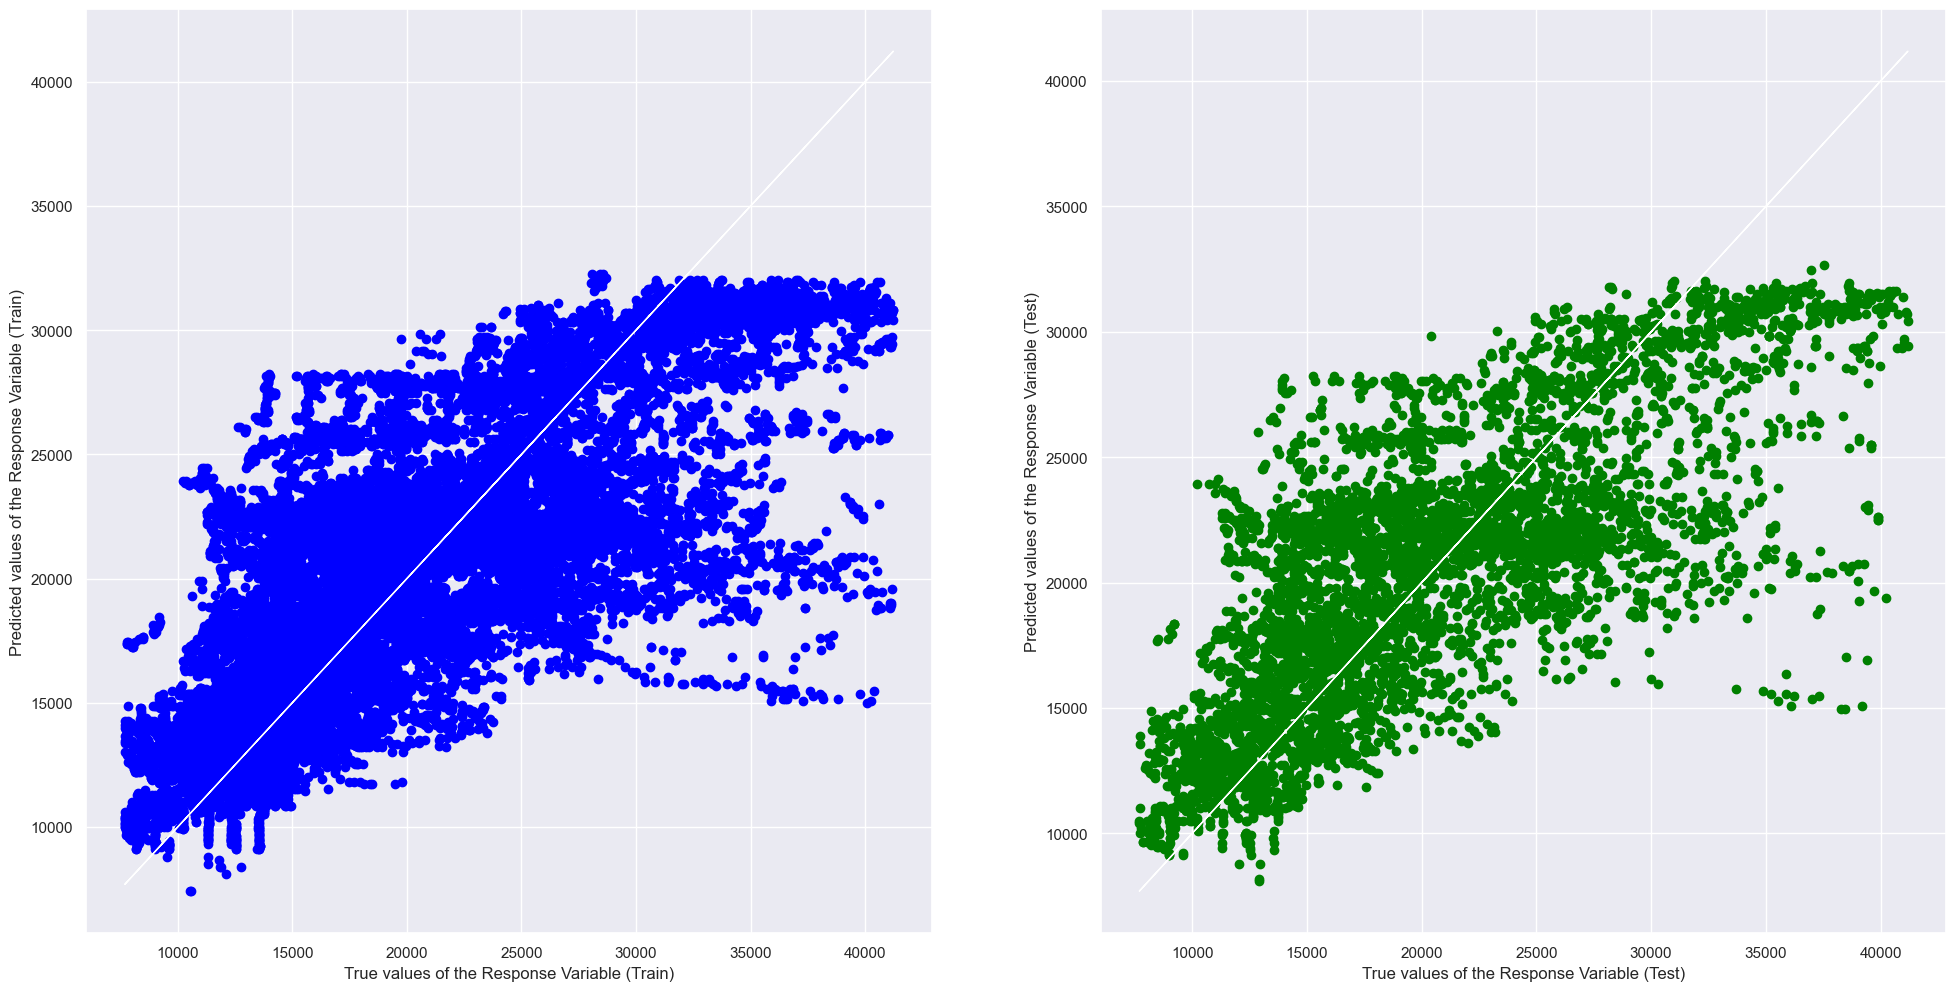

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.5479514307290734
Mean Squared Error (MSE) 	: 24432143.385851637

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.5446884367917875
Mean Squared Error (MSE) 	: 25079269.539048735



In [22]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

In [23]:
# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

       Predictors  Coefficients
0  brand_category    343.599987
1         quarter     97.882801



<AxesSubplot:>

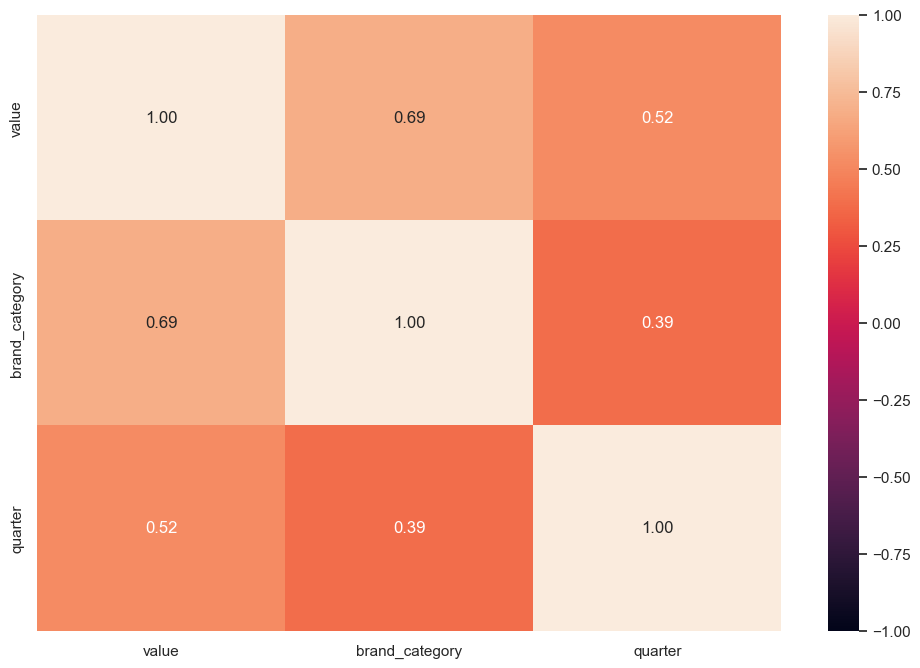

In [24]:
# Correlation between Response and the Predictors
trainDF = pd.concat([y_train, X_train], axis = 1).reindex(y_train.index)

f = plt.figure(figsize=(12, 8))
sb.heatmap(trainDF.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

In [25]:
print(linreg.intercept_)

[5695.71933636]


# Linear Regression Model for Carprice under Category A

# carprice = 5695 + 343Brand_category + 97quarter

# Extracting Category B carprice

In [27]:
cat2 = carprice.loc[carprice['category'] == 2]
cat2

size    year  month    value   brand  category  quarter  brand_category
4      1998  2023.0    1.0  45497.0  B.M.W.       2.0     76.0              55
5      1998  2023.0    1.0  42906.0  B.M.W.       2.0     76.0              55
6      1998  2023.0    1.0  48455.0  B.M.W.       2.0     76.0              55
7      1998  2023.0    1.0  51204.0  B.M.W.       2.0     76.0              55
8      1998  2023.0    1.0  50897.0  B.M.W.       2.0     76.0              55
...     ...     ...    ...      ...     ...       ...      ...             ...
72554  1984  2004.0   12.0  38214.0   VOLVO       2.0      3.0              49
72555  2521  2004.0   12.0  43239.0   VOLVO       2.0      3.0              49
72556  2521  2004.0   12.0  50361.0   VOLVO       2.0      3.0              49
72557  2922  2004.0   12.0  53378.0   VOLVO       2.0      3.0              49
72558  2922  2004.0   12.0  59011.0   VOLVO       2.0      3.0              49

[42063 rows x 8 columns]

In [28]:
cat2.to_csv('Car Cat B prices.csv', index = False)

In [78]:
q_low = cat2["value"].quantile(0.01)
q_hi  = cat2["value"].quantile(0.85)

cat2_filtered = cat2[(cat2["value"] < q_hi) & (cat2["value"] > q_low)]

In [79]:
# Extract Response and Predictors
y = pd.DataFrame(cat2_filtered["value"])
X = pd.DataFrame(cat2_filtered[["brand_category", "quarter"]])

In [80]:
# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 45, test_size = 0.20)

Intercept of Regression 	: b =  [3950.70428983]
Coefficients of Regression 	: a =  [[769.77029837  16.86838981]]

       Predictors  Coefficients
0  brand_category    769.770298
1         quarter     16.868390



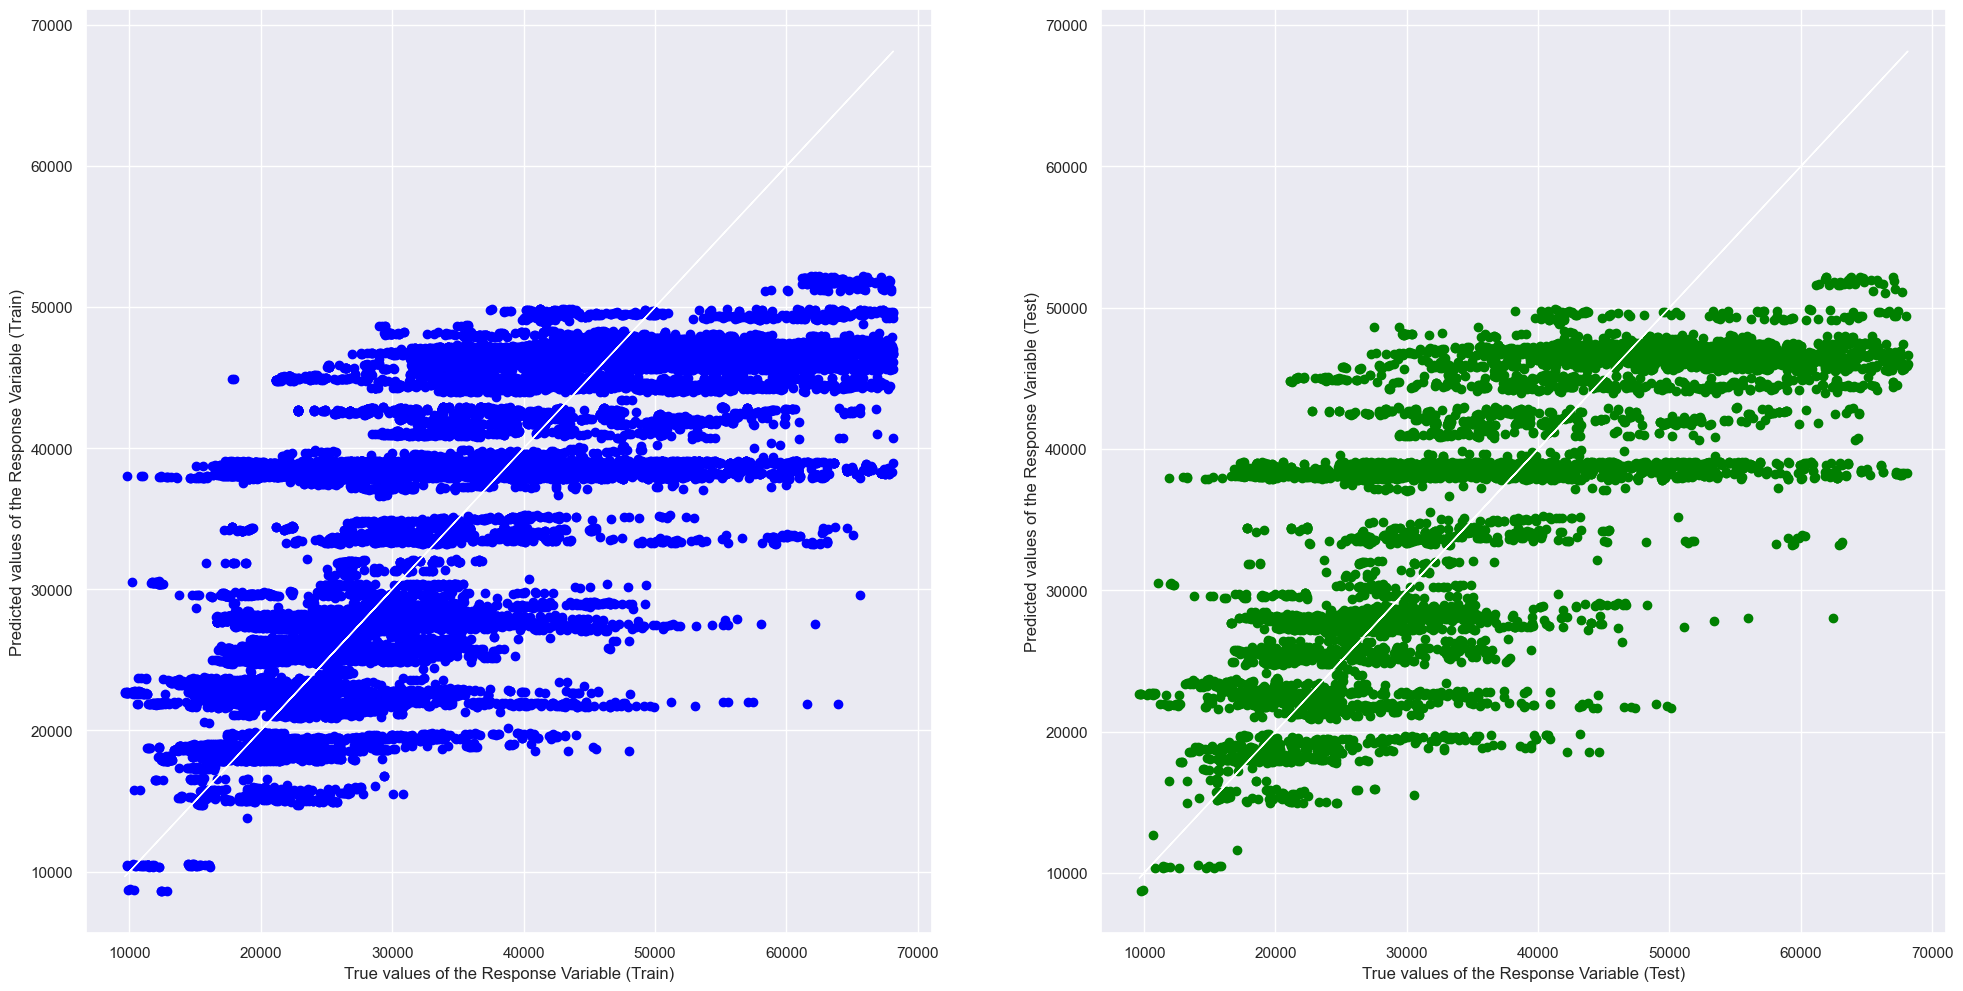

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.5087318549376083
Mean Squared Error (MSE) 	: 84786005.37523088

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.5156615646078506
Mean Squared Error (MSE) 	: 84146499.31716202



In [81]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

<AxesSubplot:>

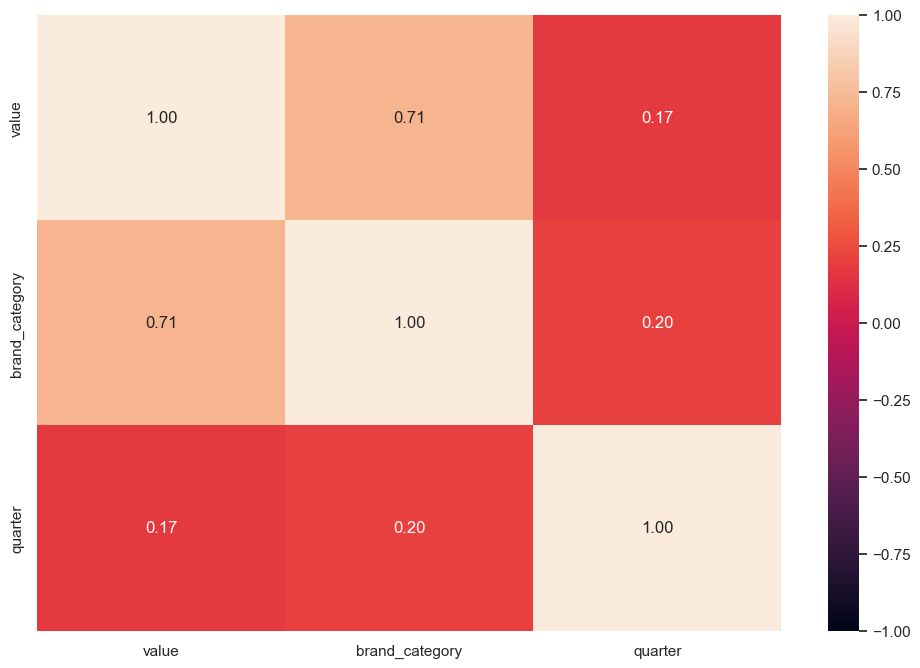

In [82]:
# Correlation between Response and the Predictors
trainDF = pd.concat([y_train, X_train], axis = 1).reindex(y_train.index)

f = plt.figure(figsize=(12, 8))
sb.heatmap(trainDF.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

In [83]:
print(linreg.intercept_)

[3950.70428983]


# Linear Regression Model for Carprice under Category B

# carprice = 3950 + 769Brand_category + 16quarter